# Welcome to the FabSim3 automation toolkit tutorial

[FabSim3](https://fabsim3.readthedocs.io/en/latest/) is a Python-based automation toolkit for scientific simulation and data processing workflows, licensed under the BSD 3-clause license. It is a component of the [VECMA Toolkit](http://www.vecma-toolkit.eu), which is developed as a part of the [VECMA](http://www.vecma.eu) project funded by the European Union Horizon 2020 research and innovation programme.

FabSim3 supports the use of simple one-liner commands to:

- Organize input, output and environment information, creating a consistent log and making it possible by default to repeat/reproduce runs.
- Establish and run coupled models using the workflow automation functionalities.
- Perform large ensemble simulations (or replicated ones) using a one-line command.
- Enable the execution of simulation and analysis tasks on supercomputers.

Users can perform complex remote tasks from a local command-line, and run single jobs, ensembles of multiple jobs, and dynamic workflows through schedulers such as SLURM, Portable Batch System Professional (PBSPro), LoadLeveller and Quality in Cloud and Grid [(QCG)](http://www.qoscosgrid.org/trac/qcg). FabSim3 stores machine-specific configurations in the repository, and applies it to all applications run on that machine. These configurations are updated by any contributor who feels that a fix or improvement is required.

- #### <p> <span style="color:red"><em> <b> NOTE </b> This setup targets VECMA Jupyter Notebook platform, if you want to use this tutorial on your local PC, please use FabSim3_local.ipynb file</em> text</span>.</p>

## Intalling FabSim3 

To install [FabSim3](https://github.com/djgroen/FabSim3), clone the repository using:

In [1]:
%%bash

if [ ! -d "FabSim3" ]
then
    git clone https://github.com/djgroen/FabSim3
    echo "FabSim3 rep cloned in -> " $PWD
else
    git -C FabSim3 pull
    echo "updating FabSim3 rep cloned in -> " $PWD
fi

FabSim3 rep cloned in ->  /home/jovyan/tutorials/VECMAtk/FabSim3


Cloning into 'FabSim3'...


### Setup ssh key

setup ssh connection for executing jobs on localhost   

In [2]:
%%bash

PORT=2222

/usr/sbin/sshd -f /etc/ssh-jovyan/sshd_config
rm -rf ~/.ssh
mkdir ~/.ssh
ssh-keygen -t rsa -N "" -f ~/.ssh/id_rsa
cat ~/.ssh/id_rsa.pub >> ~/.ssh/authorized_keys
chmod og-wx ~/.ssh/authorized_keys
ssh-keyscan -4 -p $PORT localhost >> ~/.ssh/known_hosts


Generating public/private rsa key pair.
Your identification has been saved in /home/jovyan/.ssh/id_rsa.
Your public key has been saved in /home/jovyan/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:bxnga9v0yXDRJNVYOR45hmJZt76Uz64kV0aKNlC3VDI jovyan@jupyter-99529f35-2d292c-2d4bf6-2db941-2dc7adf3912f0f
The key's randomart image is:
+---[RSA 2048]----+
|            +.E*=|
|           = =o@o|
|        . o o =.=|
|       . . . =.+.|
|        S . = o+o|
|         o + o.+o|
|        o * o o.o|
|       . = = = . |
|        . . + ...|
+----[SHA256]-----+


# localhost:2222 SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
# localhost:2222 SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
# localhost:2222 SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3


### Dependencies

FabSim3 relies strongly on the following Python modules:

- [Fabric](http://www.fabfile.org)
- [PyYAML](https://pypi.org/project/PyYAML/) (any version), 
- [ruamel.yaml](https://pypi.org/project/ruamel.yaml/)
- [numpy](https://numpy.org/install/) and
- [cryptography](https://pypi.org/project/cryptography/).

These dependencies are marked down in the `requirements.txt` file, as

`fabric3==1.13.1.post1, 
 pyyaml, 
 pytest, 
 pytest-pep8, 
 ruamel.yaml, 
 numpy, 
 cryptography`
 
To install requitements.txt, simply run the following:

In [3]:
# Install required Python modules
!pip install -r FabSim3/requirements.txt

  Using cached Fabric3-1.13.1.post1-py3-none-any.whl (92 kB)
Processing /home/jovyan/.cache/pip/wheels/e5/9d/ad/2ee53cf262cba1ffd8afe1487eef788ea3f260b7e6232a80fc/PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl
  Using cached pytest-5.4.3-py3-none-any.whl (248 kB)
Processing /home/jovyan/.cache/pip/wheels/23/d5/e6/a0e3991c566924ea7fbc5a174c8e8ddf2c40bcb41ae32bdcb9/pytest_pep8-1.0.6-py3-none-any.whl
  Using cached ruamel.yaml-0.16.10-py2.py3-none-any.whl (111 kB)
  Using cached numpy-1.19.0-cp36-cp36m-manylinux2010_x86_64.whl (14.6 MB)
  Using cached paramiko-2.7.1-py2.py3-none-any.whl (206 kB)
  Using cached pluggy-0.13.1-py2.py3-none-any.whl (18 kB)
  Using cached py-1.9.0-py2.py3-none-any.whl (99 kB)
  Using cached more_itertools-8.4.0-py3-none-any.whl (43 kB)
  Using cached pep8-1.7.1-py2.py3-none-any.whl (41 kB)
Processing /home/jovyan/.cache/pip/wheels/1a/af/c9/28c17870e142169f9f10ded868d34f1119a1aa2321d31f05d6/pytest_cache-1.0-py3-none-any.whl
  Using cached ruamel.yaml.clib-0.2.0-cp36-

### Configure `machine_user.yml` file

To set personal configurations, copy `machines_user_example.yml` as `machines_user.yml` in the `FabSim3/deploy` folder and run the following sequence of commands, which will change `localhost:` configurations:


In [4]:
%%bash

PORT=2222

# Configure machines_user.yml
cp FabSim3/deploy/machines_user_example.yml FabSim3/deploy/machines_user.yml

# Defines your username from local configuration
sed -i "s/your-username/`whoami`/g" FabSim3/deploy/machines_user.yml

# Defines port number for localhost connection
sed -i "s#localhost:#localhost:\n  port: $PORT#g" FabSim3/deploy/machines_user.yml

# Defines working directory for configs and results directories
sed -i "s#localhost:#localhost:\n  local_configs: \"$PWD/FabSim3/config_files\"#g" FabSim3/deploy/machines_user.yml
sed -i "s#localhost:#localhost:\n  local_results: \"$PWD/FabSim3/results\"#g" FabSim3/deploy/machines_user.yml

# Defines home path for execution
sed -i "s#localhost:#localhost:\n  home_path_template: \"$PWD/FabSim3/localhost_exe\"#g" FabSim3/deploy/machines_user.yml

To view the changes made in the `machines_user.yml` file, simply run:

In [5]:
import yaml

machines_user_yml = yaml.load(open("FabSim3/deploy/machines_user.yml"), Loader=yaml.FullLoader)
print(yaml.dump({'localhost': machines_user_yml['localhost']}))

localhost:
  home_path_template: /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/localhost_exe
  local_configs: /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/config_files
  local_results: /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/results
  port: 2222
  username: jovyan



### Add FabSim3 to your PATH and PYTHONPATH

Add FabSim3 executable file to system `PATH` and setup `PYTHONPATH`

In [6]:
import os
import sys

sys.path.insert(0,  r'%s/FabSim3/bin' %(os.getcwd()))
sys.path.insert(0,  r'%s/FabSim3' %(os.getcwd()))
os.environ['PATH']=r'%s/FabSim3/bin' %(os.getcwd())+os.pathsep+os.environ['PATH']

# to test if fabsim command is availble
!which fabsim

/home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/bin/fabsim


## FabSim3 plugins

FabSim3 contains an integrated test infrastructure, more flexible customisation options using a plugin system and  examples to improve usability. These plugins will be installed in the `FabSim3/plugins` directory.

### Dummy instance - FabDummy plugin

To demonstrate the use of FabSim3 plugin, install the [FabDummy](https://github.com/djgroen/FabDummy) plugin  by running `install_plugin` command:

In [7]:
# Install FabDummy
!fabsim localhost install_plugin:FabDummy

[jovyan@localhost] Executing task 'install_plugin'
[localhost] local: mkdir -p /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/plugins
[localhost] local: rm -rf /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/plugins/FabDummy
[localhost] local: git clone https://github.com/djgroen/FabDummy.git /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/plugins/FabDummy
Cloning into '/home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/plugins/FabDummy'...
remote: Enumerating objects: 103, done.
remote: Total 103 (delta 0), reused 0 (delta 0), pack-reused 103
Receiving objects: 100% (103/103), 17.11 KiB | 287.00 KiB/s, done.
Resolving deltas: 100% (35/35), done.

Done.


#### Running FabDummy test

To test the FabDummy plugin, run a dummy job using:

In [8]:
# Execute a dummy test job
!fabsim localhost dummy:dummy_test

[jovyan@localhost] Executing task 'dummy'
[jovyan@localhost] Executing task 'put_configs'
[jovyan@localhost] run: mkdir -p /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/localhost_exe/FabSim3/config_files; mkdir -p /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/localhost_exe/FabSim3/results; mkdir -p /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/localhost_exe/FabSim3/scripts; mkdir -p /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/localhost_exe/FabSim3/config_files/dummy_test
[jovyan@localhost] rsync_project: rsync  -pthrvz  --rsh='ssh  -p 2222  ' /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/plugins/FabDummy/config_files/dummy_test/ jovyan@localhost:/home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/localhost_exe/FabSim3/config_files/dummy_test
[localhost] local: rsync  -pthrvz  --rsh='ssh  -p 2222  ' /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/plugins/FabDummy/config_files/dummy_test/ jovyan@localhost:/home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/localhost_exe/FabSim3/config_files/

### Migration Modelling - FabFlee plugin

The [FabFlee](https://github.com/djgroen/FabFlee) plugin  aims to automate the construction, execution and analysis of Flee, which is an agent-based modelling toolkit purpose-built for simulating the movement of individuals across geographical locations. An agent-based Flee simulation code is written in Python. For detailed information, see [Flee](https://flee.readthedocs.io/en/latest/index.html#) documentation.

To install Flee, clone the repository by running:

In [9]:
%%bash

# Clone the Flee repository
if [ ! -d "flee" ]
then
    git clone -b master https://github.com/djgroen/flee.git
    echo "flee rep cloned in -> " $PWD
else
    git -C flee pull
    echo "updating flee rep cloned in -> " $PWD
fi

flee rep cloned in ->  /home/jovyan/tutorials/VECMAtk/FabSim3


Cloning into 'flee'...


### Install required python modules for FLEE

In [10]:
!pip install pandas matplotlib numpy mpi4py

  Using cached pandas-1.0.5-cp36-cp36m-manylinux1_x86_64.whl (10.1 MB)
  Using cached matplotlib-3.2.2-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
Processing /home/jovyan/.cache/pip/wheels/d6/73/83/ad9dd3ebae512829ab3f21657f76403dc4aa6649e1118c9369/mpi4py-3.0.3-cp36-cp36m-linux_x86_64.whl
  Using cached pytz-2020.1-py2.py3-none-any.whl (510 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)


#### Installing FabFlee
A FabSim3-based FabFlee plugin provides an environment for researchers and organisations to construct and modify simulations, instantiate and execute multiple runs for different policy decisions, as well as to validate and visualise the obtained results against the existing data.

To install FabFlee, run `install_plugin` function using:

In [11]:
# Install FabFlee 
!fabsim localhost install_plugin:FabFlee

[jovyan@localhost] Executing task 'install_plugin'
[localhost] local: mkdir -p /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/plugins
[localhost] local: rm -rf /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/plugins/FabFlee
[localhost] local: git clone https://github.com/djgroen/FabFlee.git /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/plugins/FabFlee
Cloning into '/home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/plugins/FabFlee'...
remote: Enumerating objects: 301, done.
remote: Counting objects: 100% (301/301), done.
remote: Compressing objects: 100% (201/201), done.
remote: Total 4820 (delta 175), reused 181 (delta 99), pack-reused 4519
Receiving objects: 100% (4820/4820), 134.57 MiB | 10.35 MiB/s, done.
Resolving deltas: 100% (1551/1551), done.

Done.


#### Adding the Flee directory location to your machine_user.yml file

Since FabFlee is a plugin for the Flee simulation code, add the current location of the Flee directory to the `machines_user.yml` configuration file:

In [12]:
#!sed -i "s#localhost:#localhost:\n  flee_location: \"$PWD/flee:/opt/conda/lib/python3.6/site-packages\"#g" FabSim3/deploy/machines_user.yml
!sed -i "s#localhost:#localhost:\n  flee_location: \"$PWD/flee\"#g" FabSim3/deploy/machines_user.yml

To view changes in `machines_user.yml`, simply run the following

In [13]:
machines_user_yml = yaml.load(open("FabSim3/deploy/machines_user.yml"), Loader=yaml.FullLoader)

print(yaml.dump({'localhost': machines_user_yml['localhost']}))

localhost:
  flee_location: /home/jovyan/tutorials/VECMAtk/FabSim3/flee
  home_path_template: /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/localhost_exe
  local_configs: /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/config_files
  local_results: /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/results
  port: 2222
  username: jovyan



#### Executing a migration conflict scenario

To execute FabFlee job on a localhost, execute one of the conflict instances using `flee` function in `FabSim3/plugins/FabFlee/config_files`, such as Mali (mali, simulation period of 300 days), Burundi (burundi, simulation period of 396 days), South Sudan (ssudan, simulation period of 604 days) and Central African Republic (car, simulation period of 820 days). 

For illustration purposes, the conflict scenario of Mali is executed to obtain the simulation output for a simulation period of 50 days, which can be changed up to 300 days.

In [ ]:
!fabsim localhost flee:mali,simulation_period=100

[jovyan@localhost] Executing task 'flee'
[jovyan@localhost] Executing task 'put_configs'
[jovyan@localhost] run: mkdir -p /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/localhost_exe/FabSim3/config_files; mkdir -p /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/localhost_exe/FabSim3/results; mkdir -p /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/localhost_exe/FabSim3/scripts; mkdir -p /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/localhost_exe/FabSim3/config_files/mali
[jovyan@localhost] rsync_project: rsync  -pthrvz  --rsh='ssh  -p 2222  ' /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/plugins/FabFlee/config_files/mali/ jovyan@localhost:/home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/localhost_exe/FabSim3/config_files/mali
[localhost] local: rsync  -pthrvz  --rsh='ssh  -p 2222  ' /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/plugins/FabFlee/config_files/mali/ jovyan@localhost:/home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/localhost_exe/FabSim3/config_files/mali
sending incremental fi

#### Fetching the simulation results to `FabSim3/results` directory

After the job has finished, a message will be printed indicating where the output data resides. To fetch and copy the obtained results to `FabSim3/results` directory, simply execute:

In [15]:
!fabsim localhost fetch_results

[jovyan@localhost] Executing task 'fetch_results'
[localhost] local: rsync -pthrvz -e 'ssh -p 2222'                 jovyan@localhost:/home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/localhost_exe/FabSim3/results//                 /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/results/
receiving incremental file list
./
dummy_test_localhost_16/
dummy_test_localhost_16/dummy.txt
dummy_test_localhost_16/dummy_test_localhost_16_.sh
dummy_test_localhost_16/env.log
dummy_test_localhost_16/env.yml
mali_localhost_16/
mali_localhost_16/acled.csv
mali_localhost_16/env.log
mali_localhost_16/env.yml
mali_localhost_16/mali_localhost_16_.sh
mali_localhost_16/out.csv
mali_localhost_16/run.py
mali_localhost_16/run_par.py
mali_localhost_16/simsetting.csv
mali_localhost_16/example_sweepdir/
mali_localhost_16/example_sweepdir/100/
mali_localhost_16/example_sweepdir/100/simsetting.csv
mali_localhost_16/example_sweepdir/200/
mali_localhost_16/example_sweepdir/200/simsetting.csv
mali_localhost_16/example_swee

#### Plotting the simulation output

After fetching the simulation results, analyse and interpret simulation output by plotting graphs for individual camps comparing simulation output and UNHCR data, as well as average relative difference graph for the simulated conflict situation.

In [16]:
!fabsim localhost plot_output:mali_localhost_16,out

[jovyan@localhost] Executing task 'plot_output'
[localhost] local: mkdir -p /home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/results/mali_localhost_16/out
/home/jovyan/tutorials/VECMAtk/FabSim3/FabSim3/results/mali_localhost_16/out : Averaged error normal:  0.5300232779042934 , rescaled:  0.435968791096364 , len:  100

Done.


To list generated plots, run the following command

In [17]:
%%bash

cd FabSim3/results/mali_localhost_16/out
ls

Abala-4.png
Abala-4-rescaled.png
Bobo-Dioulasso-4.png
Bobo-Dioulasso-4-rescaled.png
error-comparison.png
error.png
Fassala-Mbera-4.png
Fassala-Mbera-4-rescaled.png
Mangaize-4.png
Mangaize-4-rescaled.png
Mentao-4.png
Mentao-4-rescaled.png
Niamey-4.png
Niamey-4-rescaled.png
numagents.png
Tabareybarey-4.png
Tabareybarey-4-rescaled.png


To view generated plots, simply run:

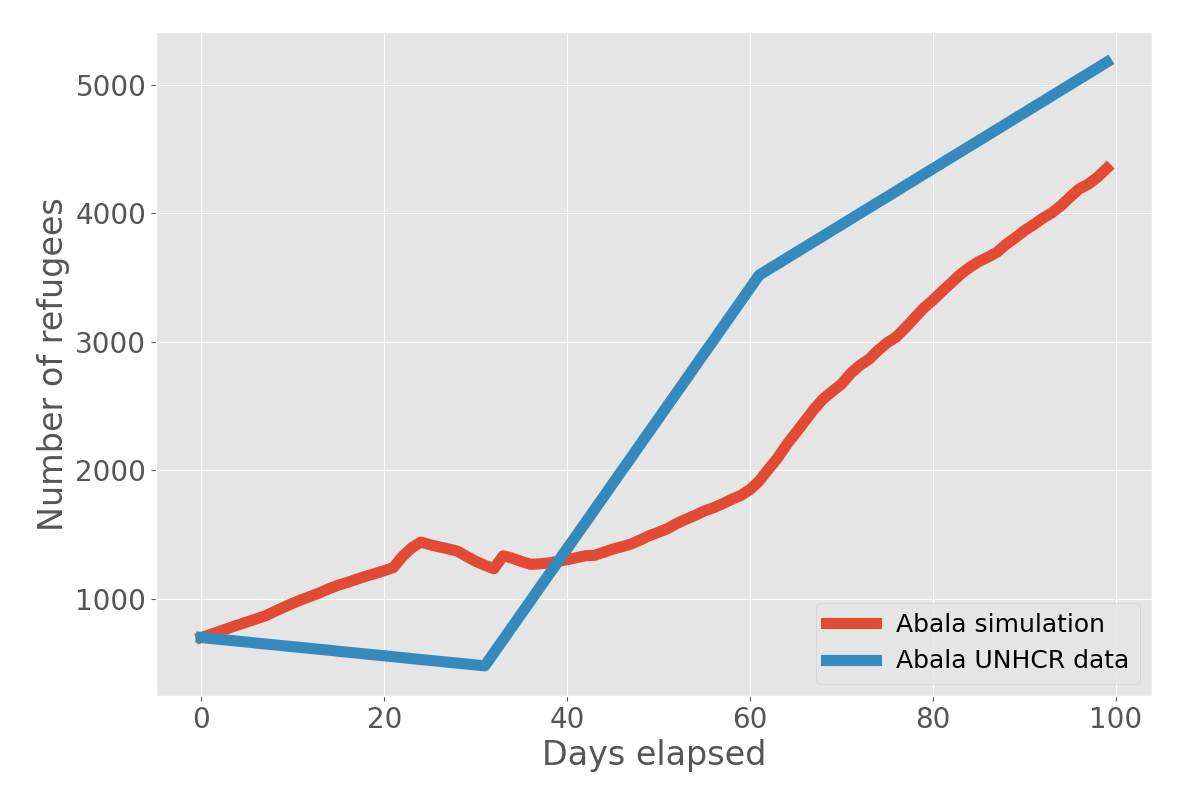

In [18]:
from IPython.display import Image 
Image('FabSim3/results/mali_localhost_16/out/Abala-4-rescaled.png')

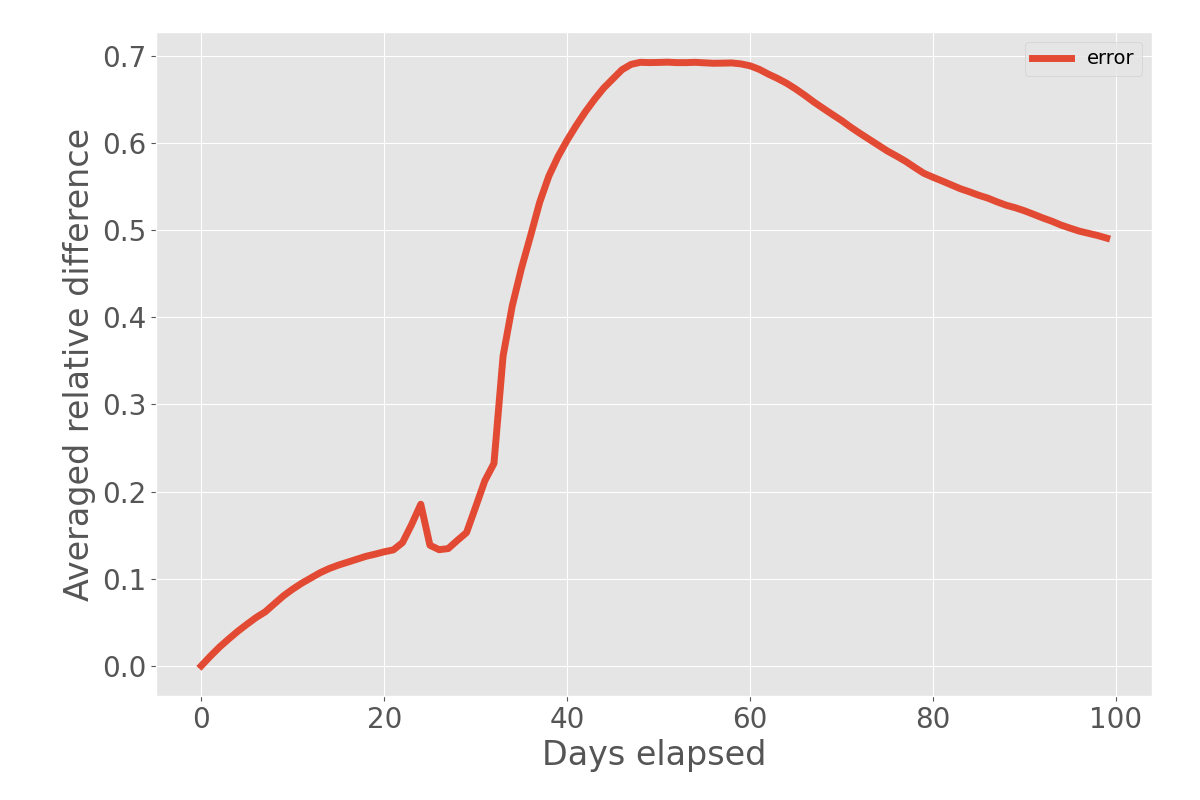

In [19]:
from IPython.display import Image 
Image('FabSim3/results/mali_localhost_16/out/error.png')